# **Automatidata project**
<img src='./Automatidata.png' width='400'>

## Project scenario

### Background
Automatidata,  a fictional data consulting firm, works with its clients to transform their unused and stored data into useful solutions, such as performance dashboards, customer-facing tools, strategic business insights, and more. They specialize in identifying a client’s business needs and utilizing their data to meet those business needs.

Automatidata is consulting for the New York City Taxi and Limousine Commission (TLC). New York City TLC is an agency responsible for licensing and regulating New York City's taxi cabs and for-hire vehicles. The agency has partnered with Automatidata to **develop a regression model that helps estimate taxi fares before the ride**, based on data that TLC has gathered.

The TLC data comes from over 200,000 taxi and limousine licensees, making approximately one million combined trips per day.

**Note:** _This project's dataset was created for pedagogical purposes and may not be indicative of New York City taxi cab riders' behavior._

### Data dictionary
This project uses a dataset called [2017_Yellow_Taxi_Trip_Data.csv](2017_Yellow_Taxi_Trip_Data.csv). It contains data gathered by the New York City Taxi & Limousine Commission. For each trip, there are many different data variables gathered.

The dataset contains:

**408,294 rows** – each row represents a different trip

**17 columns**

|**Column name**|**Description**|
|---|---|
|VendorID|A code indicating the TPEP provider that provided the record. <br><br>**1= Creative Mobile Technologies, LLC;**<br><br>**2= VeriFone Inc.**|
|tpep_pickup_datetime|The date and time when the meter was engaged.|
|tpep_dropoff_datetime|The date and time when the meter was disengaged.|
|passenger_count|The number of passengers in the vehicle.  <br><br>This is a driver-entered value.|
|trip_distance|The elapsed trip distance in miles reported by the taximeter.|
|PULocationID|TLC Taxi Zone in which the taximeter was engaged|
|DOLocationID|TLC Taxi Zone in which the taximeter was disengaged|
|RatecodeID|The final rate code in effect at the end of the trip. <br><br>**1= Standard rate** <br><br>**2=JFK** <br><br>**3=Newark** <br><br>**4=Nassau or Westchester** <br><br>**5=Negotiated fare** <br><br>**6=Group ride**|
|store_and_fwd_flag|This flag indicates whether the trip record was held in vehicle memory before being sent to the vendor, aka “store and forward,”  because the vehicle did not have a connection to the server. <br><br>**Y= store and forward trip** <br><br>**N= not a store and forward trip**|
|payment_type|A numeric code signifying how the passenger paid for the trip. <br><br>**1= Credit card** <br><br>**2= Cash** <br><br>**3= No charge** <br><br>**4= Dispute** <br><br>**5= Unknown** <br><br>**6= Voided trip**|
|fare_amount|The time-and-distance fare calculated by the meter.|
|extra|Miscellaneous extras and surcharges. Currently, this only includes the \$0.50 and \$1 rush hour and overnight charges.|
|mta_tax|\$0.50 MTA tax that is automatically triggered based on the metered rate in use.|
|Iimprovement_surcharge|\$0.30 improvement surcharge assessed trips at the flag drop. The  improvement surcharge began being levied in 2015.|
|tip_amount|Tip amount – This field is automatically populated for credit card tips. Cash tips are not included.|
|tolls_amount|Total amount of all tolls paid in trip.|
|total_amount|The total amount charged to passengers. Does not include cash tips.|


## Exploratory data analysis

### Import packages & Load dataset

In [ ]:
# Import packages
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_squared_error

import pickle

In [ ]:
# Load dataset into a dataframe
df = pd.read_csv('2017_Yellow_Taxi_Trip_Data.csv')

# Display first few rows of the dataframe
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,1,11/15/2017 11:33,11/15/2017 11:34,1,0.2,1,N,90,249,2,3.0,0.0,0.5,0.00,0.0,0.3,3.80
1,1,4/16/2017 2:03,4/16/2017 2:27,1,2.6,1,N,79,148,1,15.5,0.5,0.5,3.35,0.0,0.3,20.15
2,2,6/12/2017 15:50,6/12/2017 16:02,5,2.1,1,N,144,137,2,10.5,0.0,0.5,0.00,0.0,0.3,11.30
3,2,4/18/2017 23:50,4/18/2017 23:52,3,0.8,1,N,48,68,1,4.5,0.5,0.5,1.16,0.0,0.3,6.96
4,1,4/27/2017 5:32,4/27/2017 5:43,1,6.1,1,N,226,138,1,18.5,0.5,0.5,3.95,0.0,0.3,23.75


### Data exploration & Data cleaning
#### Gather basic information and descriptive statistics about the data

In [ ]:
# Gather basic information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 408294 entries, 0 to 408293
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   VendorID               408294 non-null  int64  
 1   tpep_pickup_datetime   408294 non-null  object 
 2   tpep_dropoff_datetime  408294 non-null  object 
 3   passenger_count        408294 non-null  int64  
 4   trip_distance          408294 non-null  float64
 5   RatecodeID             408294 non-null  int64  
 6   store_and_fwd_flag     408294 non-null  object 
 7   PULocationID           408294 non-null  int64  
 8   DOLocationID           408294 non-null  int64  
 9   payment_type           408294 non-null  int64  
 10  fare_amount            408294 non-null  float64
 11  extra                  408294 non-null  float64
 12  mta_tax                408294 non-null  float64
 13  tip_amount             408294 non-null  float64
 14  tolls_amount           408294 non-nu

The dataset has no missing data. Next we check for duplicates.

In [ ]:
# Check for duplicates
print('Total count of duplicates:', df.duplicated(keep=False)[0].sum())

Total count of duplicates: 0


The purpose of our project is to develop a regression model that helps estimate taxi fares before the ride. From the result of `info()` as well as the data dictionary we have got ealier, there are few points we can note for now:
- `fare_amount` will be our target variable
- `VendorID`, `tpep_pickup_datetime`, `passenger_count`, `PULocationID`, `DOLocationID` are the variables we may use to build the model
- `trip_distance` might be the variable with strongest relationship with `fare_amount` but in reality we do not know it until after the trip is occured so we cannot train our model on this feature. We keep it as it would be helpful for data exploration. On the other hand, we can try to calculate the `pre_distance` by `PULocationID` and `DOLocationID` using [Taxi Zone Geospatial Data](https://data.cityofnewyork.us/Transportation/NYC-Taxi-Zones/d3c5-ddgc) and `geopandas` package.
- From `tpep_pickup_datetime` and `tpep_dropoff_datetime` we will calculate `trip_duration`
- Keep `RatecodeID` and `payment_type` for data exploration
- Other features are likely irrelevant in our project and would be safe to be dropped.

In [ ]:
# drop irrelevant variables
df.drop(['store_and_fwd_flag', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount'], axis=1, inplace=True)
df.shape

(408294, 10)

#### Calculate `pre_distance`

In [ ]:
# ! pip install geopandas
import geopandas as gpd
taxi_zones = gpd.read_file('https://data.cityofnewyork.us/api/geospatial/d3c5-ddgc?method=export&format=Original')
taxi_zones.head()

c:\Users\maanh\miniconda3\envs\data_analysis\Lib\site-packages\pyogrio\core.py:23: RuntimeWarning: Could not detect GDAL data files.  Set GDAL_DATA environment variable to the correct path.
  _init_gdal_data()


,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry
0,1,0.116357,0.000782,Newark Airport,1,EWR,"POLYGON ((933100.918 192536.086, 933091.011 19..."
1,2,0.433470,0.004866,Jamaica Bay,2,Queens,"MULTIPOLYGON (((1033269.244 172126.008, 103343..."
2,3,0.084341,0.000314,Allerton/Pelham Gardens,3,Bronx,"POLYGON ((1026308.77 256767.698, 1026495.593 2..."
3,4,0.043567,0.000112,Alphabet City,4,Manhattan,"POLYGON ((992073.467 203714.076, 992068.667 20..."
4,5,0.092146,0.000498,Arden Heights,5,Staten Island,"POLYGON ((935843.31 144283.336, 936046.565 144..."


In [ ]:
# unit of geo file
taxi_zones.crs.axis_info[0].unit_name

'US survey foot'

In [ ]:
# convert geometry shape to its centroid point
taxi_zones['geometry'] = taxi_zones.centroid

# create pickup and dropoff geometry df
PU_df = taxi_zones.merge(df['PULocationID'], left_on='OBJECTID', right_on='PULocationID', how='right')
DO_df = taxi_zones.merge(df['DOLocationID'], left_on='OBJECTID', right_on='DOLocationID', how='right')

# create pre_distance column in df
df['pre_distance'] = np.round(PU_df.distance(DO_df).values/5280, 2) # convert foot to mile

df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,pre_distance
0,1,11/15/2017 11:33,11/15/2017 11:34,1,0.2,1,90,249,2,3.0,0.62
1,1,4/16/2017 2:03,4/16/2017 2:27,1,2.6,1,79,148,1,15.5,0.65
2,2,6/12/2017 15:50,6/12/2017 16:02,5,2.1,1,144,137,2,10.5,1.72
3,2,4/18/2017 23:50,4/18/2017 23:52,3,0.8,1,48,68,1,4.5,1.09
4,1,4/27/2017 5:32,4/27/2017 5:43,1,6.1,1,226,138,1,18.5,3.68


#### Calculate `trip_duration`

In [ ]:
# convert pickup columns to datetime
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])

# create new columns from pickup datetime
df['day_of_week'] = df['tpep_pickup_datetime'].dt.dayofweek
df['hour'] = df['tpep_pickup_datetime'].dt.hour
df['weekend'] = df['day_of_week'].apply(lambda x: 1 if x in [5, 6] else 0)

# calculate trip_duration
df['trip_duration'] = (df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']).dt.total_seconds().div(60).astype(int)

#### Explore data

In [ ]:
# Gather descriptive statistics about the data
df.describe()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,pre_distance,day_of_week,hour,weekend,trip_duration
count,408294.000000,408294,408294,408294.000000,408294.000000,408294.000000,408294.000000,408294.000000,408294.000000,408294.000000,400768.000000,408294.000000,408294.000000,408294.000000,408294.000000
mean,1.547191,2017-06-29 15:12:38.049934592,2017-06-29 15:29:00.761510144,1.623854,2.924228,1.044779,162.956000,160.988207,1.337115,12.967396,2.090100,3.033809,13.658437,0.280643,16.378526
min,1.000000,2017-01-01 00:02:00,2017-01-01 00:09:00,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,-100.000000,0.000000,0.000000,0.000000,0.000000,-53.000000
25%,1.000000,2017-03-29 23:37:45,2017-03-29 23:58:15,1.000000,0.980000,1.000000,114.000000,107.000000,1.000000,6.500000,0.780000,1.000000,9.000000,0.000000,7.000000
50%,2.000000,2017-06-23 23:23:00,2017-06-23 23:40:00,1.000000,1.620000,1.000000,162.000000,162.000000,1.000000,9.500000,1.310000,3.000000,14.000000,0.000000,11.000000
75%,2.000000,2017-10-02 02:51:00,2017-10-02 03:50:15,2.000000,3.040000,1.000000,233.000000,233.000000,2.000000,14.500000,2.370000,5.000000,19.000000,1.000000,18.000000
max,2.000000,2017-12-31 23:58:00,2018-01-01 00:28:00,8.000000,106.200000,99.000000,265.000000,265.000000,4.000000,3000.000000,24.960000,6.000000,23.000000,1.000000,1440.000000
std,0.497769,NaN,NaN,1.263783,3.735607,0.590107,66.581429,70.439875,0.493654,12.358725,2.403182,1.949580,6.271039,0.449314,54.504381


Notes from the table of summary statistics:
- `fare_amount`, `trip_distance`, `trip_duration` all have outliers
- `fare_amount` and `trip_duration` have negative values which does not make sense. For now, we will drop the records with negative `fare_amount`
- `RatecodeID` also has an unexpected max value of 99

In [ ]:
# drop records with negative fare_amount or trip_duration
df = df[~ (df['fare_amount'] < 0)]
df.shape

(408105, 15)

In [ ]:
# filter data with unexpected RatecodeID
df[df['RatecodeID'] >= 6]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,pre_distance,day_of_week,hour,weekend,trip_duration
32381,1,2017-04-27 20:11:00,2017-04-27 20:11:00,0,0.0,99,114,264,1,12.25,NaN,3,20,0,0
95229,1,2017-04-27 19:44:00,2017-04-27 19:44:00,0,0.0,99,249,264,1,24.95,NaN,3,19,0,0
108717,1,2017-02-08 11:56:00,2017-02-08 11:56:00,1,0.0,6,142,142,1,2.50,0.0,2,11,0,0
123692,1,2017-04-27 22:10:00,2017-04-27 22:10:00,0,0.0,99,264,264,1,10.55,NaN,3,22,0,0
183864,1,2017-03-12 01:59:00,2017-03-12 01:59:00,0,0.0,99,234,264,1,12.95,NaN,6,1,1,0
201995,1,2017-03-12 18:29:00,2017-03-12 18:29:00,1,0.0,6,132,132,4,2.50,0.0,6,18,1,0
245231,1,2017-05-25 16:19:00,2017-05-25 16:19:00,1,0.0,99,161,264,2,0.00,NaN,3,16,0,0
257376,1,2017-10-10 10:31:00,2017-10-10 10:31:00,1,0.0,6,138,138,3,2.50,0.0,1,10,0,0
269449,1,2017-08-17 17:10:00,2017-08-17 17:10:00,0,0.0,99,264,264,3,27.00,NaN,3,17,0,0
275825,1,2017-08-22 15:09:00,2017-08-22 15:09:00,0,0.0,99,264,264,1,6.00,NaN,1,15,0,0


The records with `RatecodeID` 99 have both `trip_distance` and
`trip_duration` are equal 0 while according to data dicitonary, the records with `RatecodeID` 6 are voided trips. It is reasonable for us to drop these rows.

In [ ]:
df = df[~(df['RatecodeID'] >= 6)]
df.shape

(408090, 15)

<Axes: xlabel='fare_amount'>

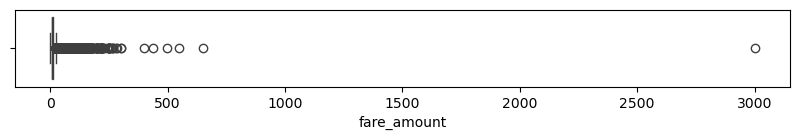

In [ ]:
# create boxplot of fare_amount
plt.figure(figsize=(10, 1))
sns.boxplot(df, x='fare_amount')

In [ ]:
# filter records that have more than $300 fare_amount
df[df['fare_amount'] > 300]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,pre_distance,day_of_week,hour,weekend,trip_duration
51284,2,2017-03-18 01:18:00,2017-03-18 01:19:00,1,0.0,5,265,265,1,400.0,NaN,5,1,1,1
208330,1,2017-08-02 02:51:00,2017-08-02 02:52:00,1,0.0,5,132,132,4,650.0,0.0,2,2,0,1
240834,1,2017-07-02 14:56:00,2017-07-02 14:56:00,6,15.4,5,48,48,2,3000.0,0.0,6,14,1,0
252107,1,2017-07-24 02:07:00,2017-07-24 02:08:00,1,0.0,5,7,7,2,550.0,0.0,0,2,0,1
255089,2,2017-09-13 18:17:00,2017-09-13 18:19:00,1,0.0,5,163,163,2,499.0,0.0,2,18,0,2
337378,2,2017-08-07 11:18:00,2017-08-07 13:10:00,1,93.8,4,138,265,1,437.0,NaN,0,11,0,112


Some records have `trip_duration` or `trip_distance` equal 0, yet are associated with unusually large `fare_amounts`. It is safe to drop them when building prediction model.

In [ ]:
# drop records with unreasonable fare_amount and trip_duration/distance
df = df[~((df['fare_amount'] > 50) & ((df['trip_distance'] == 0) | (df['trip_duration'] == 0)))]
df.shape

(407356, 15)

Now let's take another look at `fare_amount` distribution.

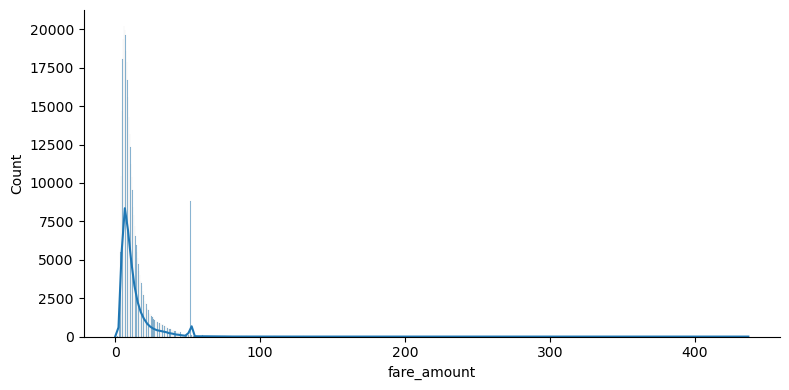

In [ ]:
# create histogram of fare_amount
sns.displot(df, x='fare_amount', kde=True, height=4, aspect=2)

There are a significance amount of records that have `fare_amount` around $50. This might be trip with fixed rate. We note this and will investigate further later.

Next let's explore the relationship of `fare_amount` with other variables.

<Axes: xlabel='RatecodeID', ylabel='fare_amount'>

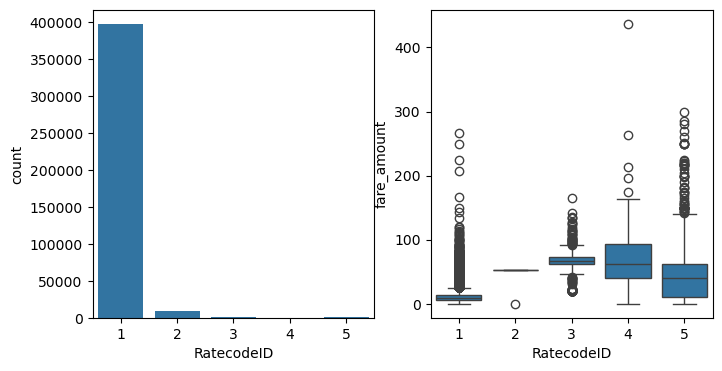

In [ ]:
# plot relationship between fare_amount and RatecodeID
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8,4))
sns.countplot(df, x='RatecodeID', ax=ax1)
sns.boxplot(df, x='RatecodeID', y='fare_amount', ax=ax2)

<Axes: xlabel='trip_distance', ylabel='fare_amount'>

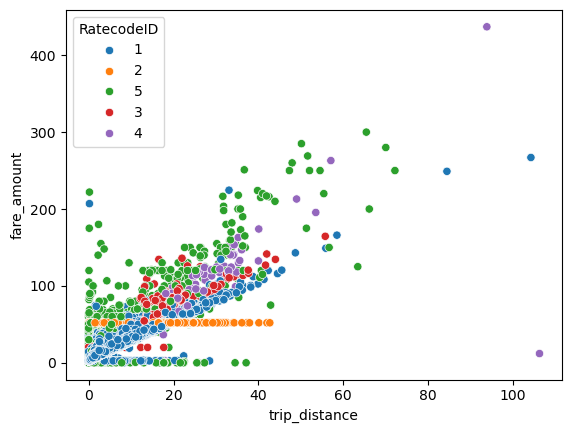

In [ ]:
# convert categorical variable to string
df['RatecodeID'] = df['RatecodeID'].astype('string')

# plot scatterplot with hue RatecodeID
sns.scatterplot(df, y='fare_amount', x='trip_distance', hue='RatecodeID')


There is a strong realtionship between `RatecodeID` and `fare_amount`. First notable point is that the fixed rate around \$50 we see earlier seem to link with the `RatecodeID` 2, which is JFK rate. After a quick search, there is indeed [a flat rate $52 for taxi between JFK (John F. Kennedy International Airport) and Manhattan](https://www.bloomberg.com/news/articles/2022-11-15/nyc-taxi-cab-fares-to-rise-23-in-first-increase-since-2012) in 2017. Let's verify this.

In [ ]:
df[df['RatecodeID'] == '2']['fare_amount'].value_counts()

fare_amount
52.0    8762
0.0        1
Name: count, dtype: int64

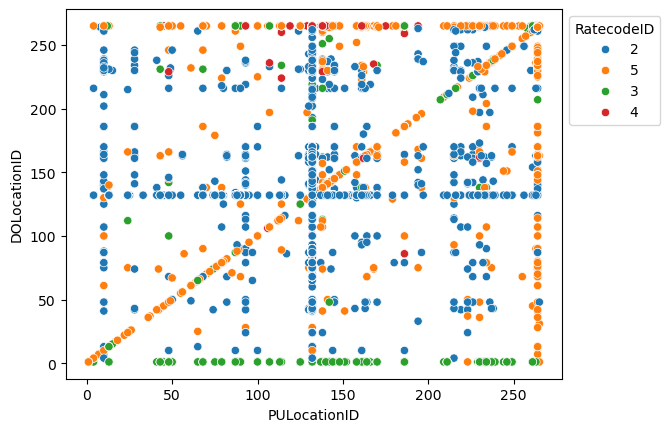

In [ ]:
# scatter plot pickup and dropoff location based on RatecodeID
ax = sns.scatterplot(df[df['RatecodeID'] != '1'], x='PULocationID', y='DOLocationID', hue='RatecodeID')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

Combine with information of this [New York Taxi Fare](https://www.nyc.gov/site/tlc/passengers/taxi-fare.page) website, we understand several points about the `RatecodeID` feature:
- `RatecodeID` 1 is standard metered fare with \$2.50 initial charge
- `RatecodeID` 2 is for trips between Manhattan and JFK Airpost (ID #132) and will have flat fare of $52
- `RatecodeID` 3 is for trips to Newark Airport EWR (ID #1) and are charged the standard metered fare
- `RatecodeID` 4 is for trips goes beyond the City limit to Nassau or Westchester (ID #265) and will have double metered fare for the amount from the City limit to destination
- `RatecodeID` 5 is for trips outside of the city with negotiated rate before the trip. As show in the graph it often have the same `PULocationID`, `DOLocationID` or one of the id is #265 or #264 - Unknown.

For our model it is better to drop trip with `RatecodeID` 2 since they are flat rate and trips with `PULocationID` or `DOLocationID` #264, #265 since we do not have information about its pickup/dropoff location. We will also remove any trips that have `fare_amount` less than $2.50.

In [ ]:
# drop trips with flat rate, unknown pickup/dropoff location or have fare smallter than initial charge
df = df[~((df['RatecodeID'] == '2') | (df['PULocationID'].isin([264, 265])) | (df['DOLocationID'].isin([264, 265])) | (df['fare_amount'] < 2.5))]
df.shape

(391362, 15)

<Axes: xlabel='VendorID', ylabel='fare_amount'>

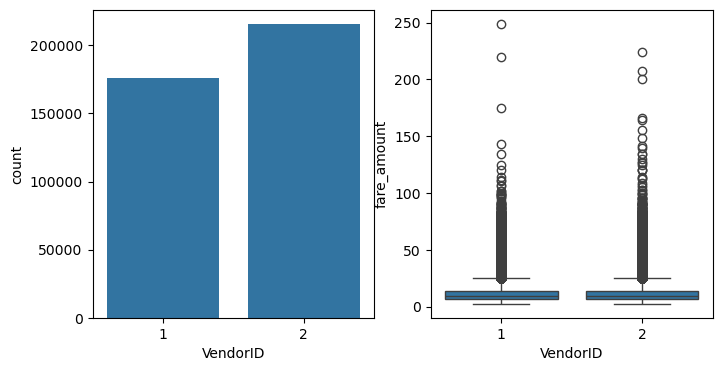

In [ ]:
# plot relationship between fare_amount and VendorID
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8,4))
sns.countplot(df, x='VendorID', ax=ax1)
sns.boxplot(df, x='VendorID', y='fare_amount', ax=ax2)

<Axes: xlabel='passenger_count', ylabel='fare_amount'>

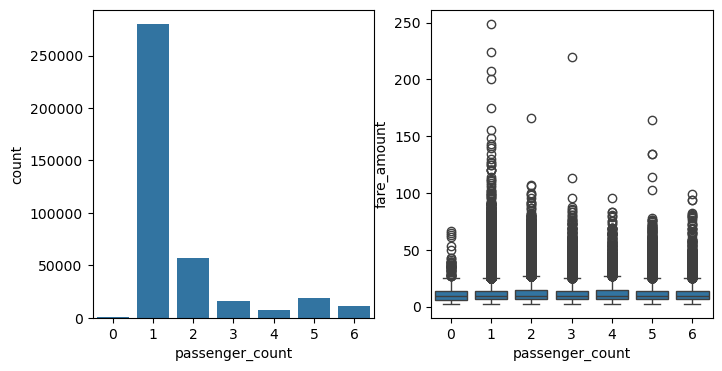

In [ ]:
# plot relationship between fare_amount and passenger_count
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8,4))
sns.countplot(df, x='passenger_count', ax=ax1)
sns.boxplot(df, x='passenger_count', y='fare_amount', ax=ax2)

<Axes: xlabel='payment_type', ylabel='fare_amount'>

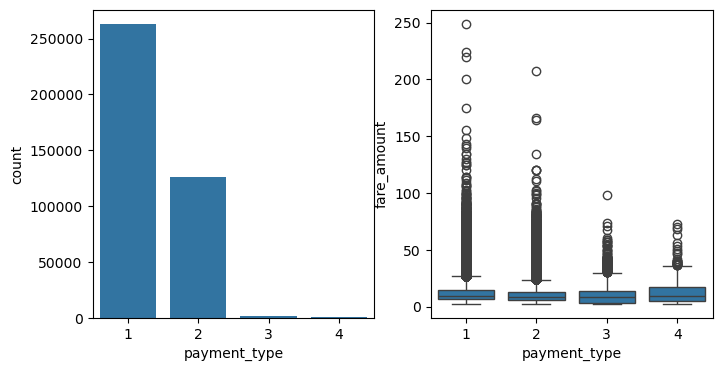

In [ ]:
# plot relationship between fare_amount and payment_type
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8,4))
sns.countplot(df, x='payment_type', ax=ax1)
sns.boxplot(df, x='payment_type', y='fare_amount', ax=ax2)

It seems that other categorical/discrete features do not link with significant variation in the fare.

<Axes: xlabel='trip_duration', ylabel='fare_amount'>

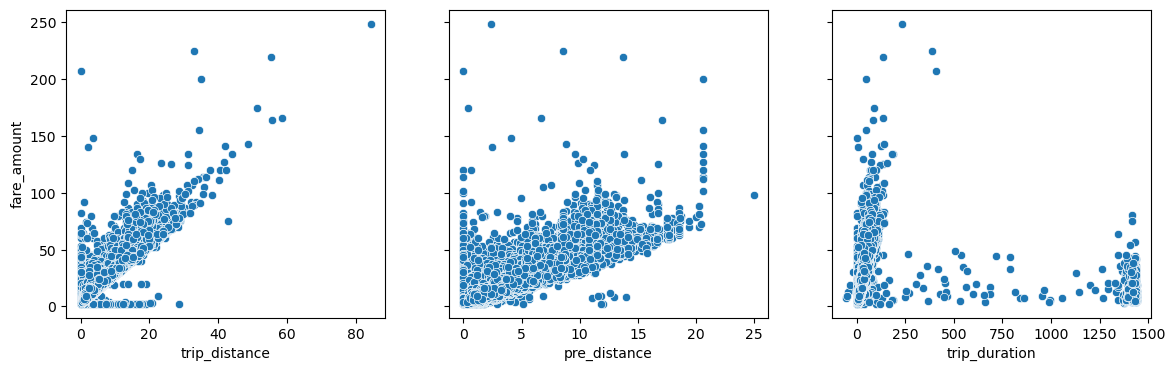

In [ ]:
# plot relationship between fare_amount and trip_distance, pre_distance and trip_duration
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(14,4), sharey='all')
sns.scatterplot(df, x='trip_distance', y='fare_amount', ax=ax1)
sns.scatterplot(df, x='pre_distance', y='fare_amount', ax=ax2)
sns.scatterplot(df, x='trip_duration', y='fare_amount', ax=ax3)

There is a clear linear relationship between `trip_distance`/ `pre_distance` and `fare_amount` while `trip_duration` appears to have many outliers, possibly due to the meter being disengaged incorrectly. Since `trip_duration` will not be used to build the model, these records will be retained.

Finally let's take a look at relation between `fare_amount` and the pickup time.

<Axes: xlabel='day_of_week', ylabel='fare_amount'>

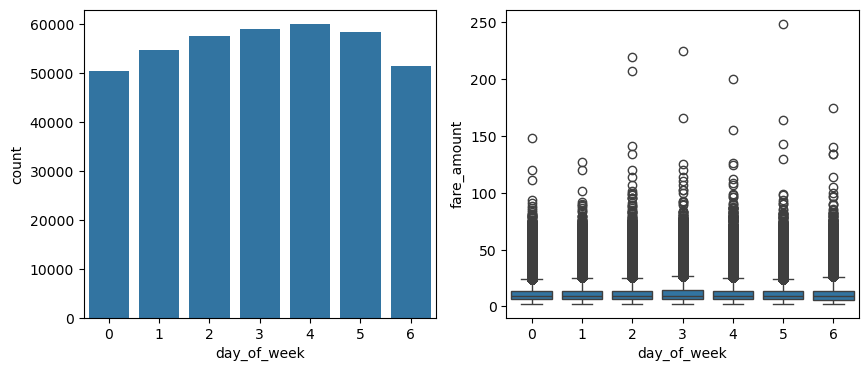

In [ ]:
# plot relationship between fare_amount and pickup day of week
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,4))
sns.countplot(df, x='day_of_week', ax=ax1)
sns.boxplot(df, x='day_of_week', y='fare_amount', ax=ax2)

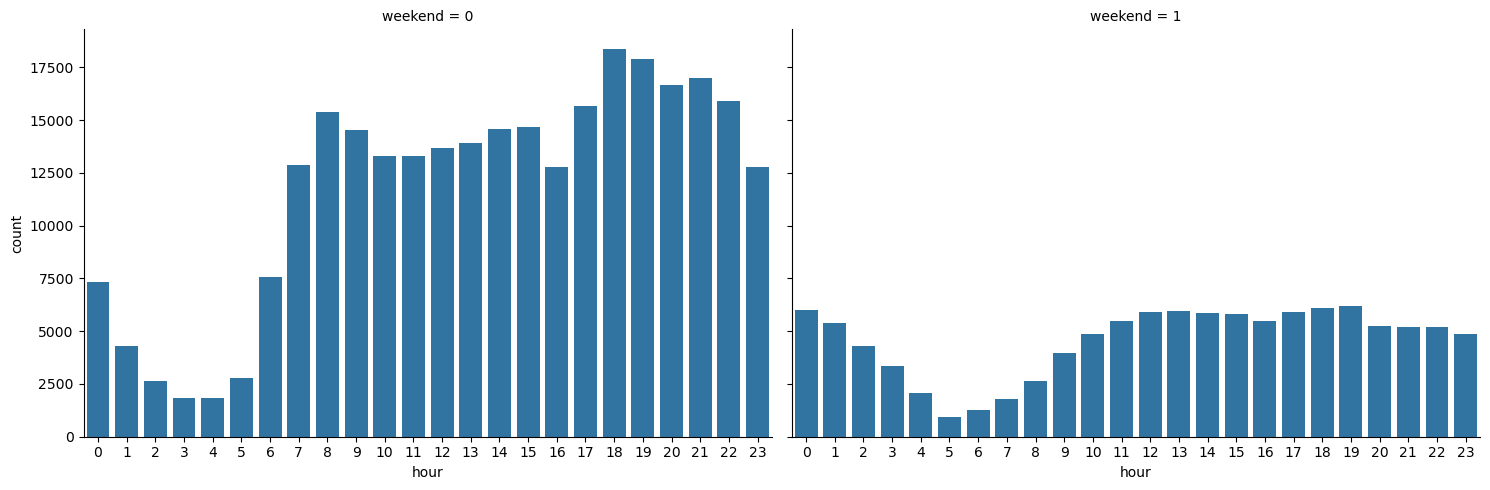

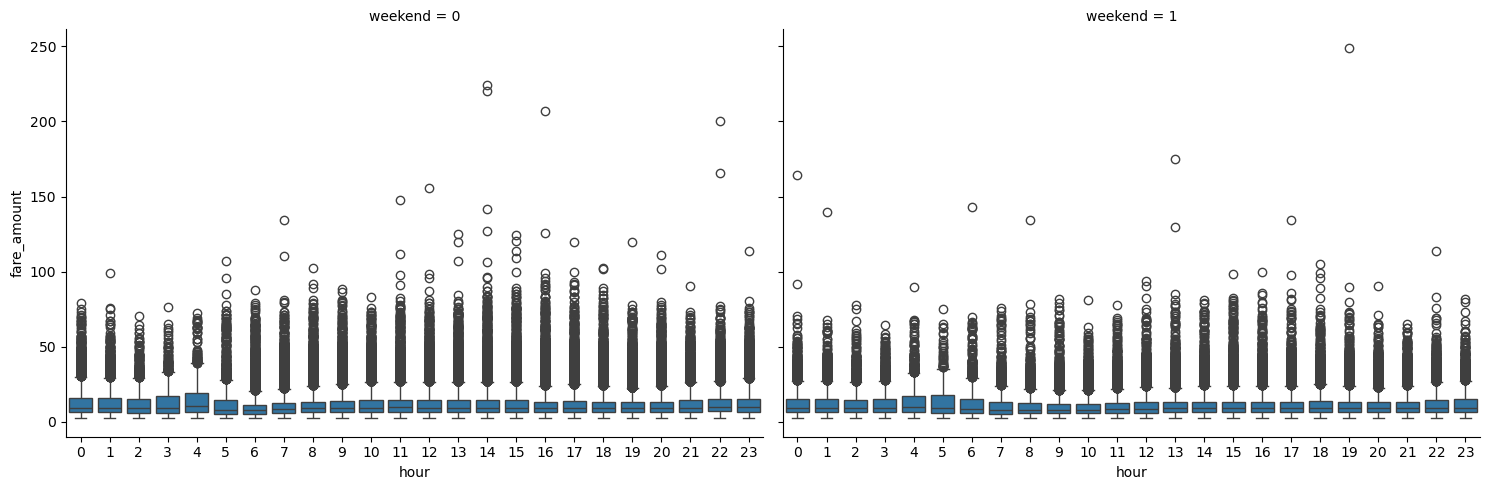

In [ ]:
# plot relationship between fare_amount and pickup hour
g1 = sns.FacetGrid(df, col='weekend', height=5, aspect=1.5)
g1.map(sns.countplot, "hour", order=range(0, 24))
g2 = sns.FacetGrid(df, col='weekend', height=5, aspect=1.5)
g2.map(sns.boxplot, "hour", "fare_amount", order=range(0, 24))

There are notable difference in number of trips in hour between weekday and weekend. Let's create a column `fare_per_mile` to see how day of week and hour effect the fare.

<Axes: xlabel='day_of_week', ylabel='hour'>

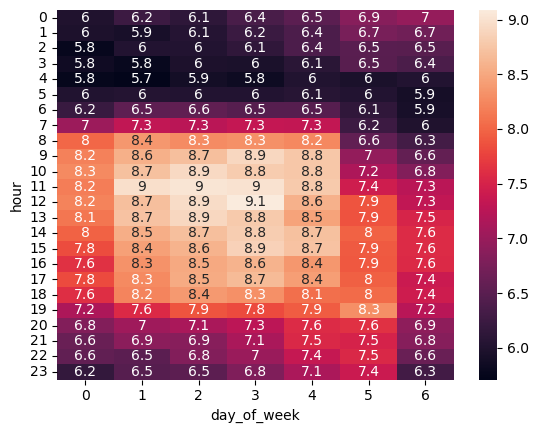

In [ ]:
df['fare_per_mile'] = df.apply(lambda x:x['fare_amount'] / x['pre_distance'] if x['pre_distance'] > 0 else x['fare_amount'], axis=1)
data = pd.pivot_table(df, values = 'fare_per_mile', index = 'hour', columns='day_of_week', aggfunc='mean')
sns.heatmap(data, annot=True)

The fare per mile is significantly higher during weekday working hours. We can add a feature indicateing whether the timing of the trip falls within these hours.

In [ ]:
df['working_hour'] = df.apply(lambda x: 1 if x['weekend'] == 0 and (8 <= x['hour'] <= 18) else 0, axis=1)

## Model building

### Feature selection & split data

In [ ]:
# feature selection
X = df[['VendorID', 'passenger_count', 'PULocationID', 'DOLocationID','pre_distance', 'day_of_week', 'hour', 'working_hour']]
y = df['fare_amount']

In [ ]:
# split data into training, validation and testing set
X_tr, X_test, y_tr, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_tr, y_tr, test_size=0.25, random_state=0)
X_train.shape, X_val.shape, X_test.shape, y_train.shape, y_val.shape, y_test.shape

((234816, 8), (78273, 8), (78273, 8), (234816,), (78273,), (78273,))

### Model selection

We will use `BayesSearchCV` from `scikit-optimize` package to tune hyperparameters and select the model that performs best on validation set measured by RSME.

In [ ]:
# !pip install scikit-optimize
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer

In [ ]:
# fit and evaluate linear regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_val = lr.predict(X_val)
print('Linear Regression - RMSE on validation set: ', np.sqrt(mean_squared_error(y_val, y_pred_val)))

Linear Regression - RMSE on validation set:  3.7458038868954238


In [ ]:
# fit and evaluate decision tree
dt = DecisionTreeRegressor(random_state=0)

param_dist = {
    'max_depth': Integer(1, 20),
    'min_samples_split': Integer(2, 20),
    'min_samples_leaf': Integer(1, 20)
    }

dt_cv = BayesSearchCV(dt, search_spaces=param_dist, cv=5, scoring='r2', random_state=0)

dt_cv.fit(X_train, y_train)
print("Decision Tree")
print("Best parameters:", dict(dt_cv.best_params_))

y_pred_val = dt_cv.predict(X_val)
print('RMSE on validation set: ', np.sqrt(mean_squared_error(y_val, y_pred_val)))

# save model
with open("dt_cv_model.pickle","wb") as to_write:
    pickle.dump(dt_cv, to_write)

Decision Tree
Best parameters: {'max_depth': 16, 'min_samples_leaf': 20, 'min_samples_split': 19}
RMSE on validation set:  3.3390656910233782


In [ ]:
# fit and evaluate random forest
rf = RandomForestRegressor(random_state=0, n_jobs=-1)

param_dist = {
    'n_estimators': Integer(50, 500),
    'max_depth': Integer(1, 20),
    'min_samples_split': Integer(2, 20),
    'min_samples_leaf': Integer(1, 20),
    'max_features': Real(0.3, 0.9),
    'max_samples': Real(0.5, 0.9)
}

rf_cv = BayesSearchCV(rf, search_spaces=param_dist, cv=5, scoring='r2', random_state=0)

rf_cv.fit(X_train, y_train)
print("Random Forest")
print("Best parameters:", dict(rf_cv.best_params_))

y_pred_val = rf_cv.predict(X_val)
print('RMSE on validation set: ', np.sqrt(mean_squared_error(y_val, y_pred_val)))

# save model
with open("rf_cv_model.pickle","wb") as to_write:
    pickle.dump(rf_cv, to_write)

Random Forest
Best parameters: {'max_depth': 18, 'max_features': 0.662788914101658, 'max_samples': 0.9, 'min_samples_leaf': 1, 'min_samples_split': 20, 'n_estimators': 500}
RMSE on validation set:  3.168655484679024


In [ ]:
# fit and evaluate xgboost
xg = XGBRegressor(random_state=0, n_jobs = -1)

param_dist = {
    'n_estimators': Integer(50, 500),
    'max_depth': Integer(1, 10),
    'learning_rate': Real(0.01, 0.2),
    'subsample': Real(0.5, 0.9),
    'colsample_bytree': Real(0.5, 0.9)
}

xg_cv = BayesSearchCV(xg, search_spaces=param_dist, cv=5, scoring='r2', random_state=0)

xg_cv.fit(X_train, y_train)
print("XGBoost")
print("Best parameters:", dict(xg_cv.best_params_))

y_pred_val = xg_cv.predict(X_val)
print('RMSE on validation set: ', np.sqrt(mean_squared_error(y_val, y_pred_val)))

# save model
with open("xg_cv_model.pickle","wb") as to_write:
    pickle.dump(xg_cv, to_write)

XGBoost
Best parameters: {'colsample_bytree': 0.8467272136916837, 'learning_rate': 0.04819164509209444, 'max_depth': 10, 'n_estimators': 310, 'subsample': 0.9}
RMSE on validation set:  3.1334773598430057


XGBoost has the best RMSE score, and is therefore the champion model.

### Use champion model to predict on test data

In [ ]:
# # load model
# with open("xg_cv_model.pickle","rb") as to_read:
#     xg_cv = pickle.load(to_read)

# predict on test set
y_pred_test = xg_cv.predict(X_test)

print('Model performance on the testing data:')
print('R^2:', r2_score(y_test, y_pred_test))
print('RMSE:',np.sqrt(mean_squared_error(y_test, y_pred_test)))

Model performance on the testing data:
R^2: 0.8586893224883467
RMSE: 3.317084753805831
